# ***1.BUSINESS UNDERSTANDING***

## ***Context:***
In today's digital age, social media platforms, particularly Twitter, have become critical channels for consumers to express their opinions about various brands and products. These opinions, encapsulated in tweets, hold valuable insights for companies regarding public perception, customer satisfaction, and market trends.

## ***Problem:***
The primary challenge is to efficiently analyze the sentiment of tweets related to different brands and products. Manually parsing through thousands of tweets is time-consuming and impractical. Therefore, there's a need for an automated system that can accurately classify the sentiment of a tweet as positive, negative, or neutral towards a brand or product.

## ***Business Objectives:***

- Sentiment Analysis: Develop an NLP model to rate the sentiment of a tweet - positive, negative, or neutral - towards a specific brand or product.
- Insight Generation: Utilize the model's output to generate insights about customer sentiment trends, helping in market analysis and strategic planning.
- Brand Monitoring: Continuously monitor the public perception of the brand and its products for reputation management and marketing strategies.

## ***Structure for Problem Solving***
### ***Business Understanding:***

- Objectives: Automate sentiment analysis of tweets related to brands and products.
- Determine success criteria: High accuracy in sentiment classification.

### ***Data Understanding:***

- Collect initial data: Analyze the provided dataset of 9,093 tweets with sentiment labels.
- Describe data: Understand the structure, quality, and characteristics of the tweet data.

### ***Data Preparation:***

- Data cleaning: Handle missing values, incorrect data entries.
- Data transformation: Convert text data into a format suitable for NLP analysis (tokenization, stemming, etc.).

### ***Modeling:***

- Select modeling techniques: Start with simpler models like Naive Bayes for binary classification (positive/negative), then advance to more complex models (RNN, LSTM, GRU) for multiclass classification (including neutral).
- Build model: Train the model using the processed tweet data.

### ***Evaluation:***

- Evaluate model: Use metrics like accuracy, precision, recall, and F1-score to assess model performance.
- Review process: Identify any shortcomings or areas for improvement in the model.

### ***Deployment:***

- Plan deployment: Integrate the model into a system for real-time tweet analysis.
- Monitor and maintain: Regularly update the model to adapt to changing language usage and trends on social media.

## ***Model Interpretation***
The model, once developed, will be capable of analyzing tweet content to determine sentiment. Advanced NLP techniques like word embeddings capture not just the presence of specific words, but also the context in which they appear, leading to more nuanced sentiment analysis. Neural networks (RNN, LSTM, GRU) can handle sequences of data, making them well-suited for analyzing the flow of language in tweets.

For instance, a tweet saying "Love the new product from [Brand]!" would be classified as positive, while "Very disappointed with [Brand]'s service" would be negative. Neutral tweets, which neither express positive nor negative sentiments, would be recognized as well.

The model's output can be visualized through dashboards, showing real-time sentiment trends and enabling businesses to quickly respond to public sentiment shifts.

To proceed, I will first explore the provided dataset to understand its structure and contents, which will inform the subsequent steps in building the sentiment analysis model.

------------------------------------------------------------------------

# ***2.DATA UNDERSTANDING***

In [1]:
import pandas as pd 

data = pd.read_csv('data.csv', encoding='ISO-8859-1')

data

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


***The dataset contains the following columns:***

- tweet_text: The text content of the tweet.
- emotion_in_tweet_is_directed_at: The brand or product towards which the emotion in the tweet is directed.
- is_there_an_emotion_directed_at_a_brand_or_product: The classified emotion in the tweet, categorized as positive, negative, or possibly neutral.

In [2]:
# Preliminary Analysis

# Basic information about the dataset as a DataFrame
info_df = pd.DataFrame({'Column': data.columns, 'Non-Null Count': data.notnull().sum(), 'Dtype': data.dtypes})

# Missing values as a DataFrame
missing_values = data.isnull().sum()

missing_values_df = pd.DataFrame(missing_values, columns=['Missing Values'])

# Basic statistics as a DataFrame
basic_stats_df = data.describe(include='all').transpose()

info_df 




,Column,Non-Null Count,Dtype
tweet_text,tweet_text,9092,object
emotion_in_tweet_is_directed_at,emotion_in_tweet_is_directed_at,3291,object
is_there_an_emotion_directed_at_a_brand_or_product,is_there_an_emotion_directed_at_a_brand_or_pro...,9093,object


In [3]:
missing_values_df


,Missing Values
tweet_text,1
emotion_in_tweet_is_directed_at,5802
is_there_an_emotion_directed_at_a_brand_or_product,0


In [4]:
basic_stats_df

,count,unique,top,freq
tweet_text,9092,9065,RT @mention Marissa Mayer: Google Will Connect...,5
emotion_in_tweet_is_directed_at,3291,9,iPad,946
is_there_an_emotion_directed_at_a_brand_or_product,9093,4,No emotion toward brand or product,5389


## ***Observations***

#### ***Based on the preliminary analysis of the dataset, here are the key findings:***

### ***Dataset Structure:***

- The dataset contains 9,093 entries.
- There are three columns: 'tweet_text', 'emotion_in_tweet_is_directed_at', and 'is_there_an_emotion_directed_at_a_brand_or_product'.

### ***Missing Values:***

- 'tweet_text' has 1 missing value.
- 'emotion_in_tweet_is_directed_at' has a significant number of missing values (5,802 out of 9,093).
- There are no missing values in 'is_there_an_emotion_directed_at_a_brand_or_product'.


### ***Data Types:***

- All columns are of object (string) data type.

### ***Basic Statistics:***

- 'tweet_text': There are 9,065 unique tweets. The most frequent tweet appears 5 times.
- 'emotion_in_tweet_is_directed_at': This column has 9 unique categories, with 'iPad' being the most frequently mentioned (946 times).
- 'is_there_an_emotion_directed_at_a_brand_or_product': There are 4 unique categories of emotions directed at a brand or product. The most common category is 'No emotion toward brand or product', occurring 5,389 times.

***The high number of missing values in 'emotion_in_tweet_is_directed_at' suggests that a significant portion of the tweets do not specify what product or brand the emotion is directed towards.***

--------------------------------
# ***3.DATA PREPARATION***

### ***Let's break down how to handle each of the columns:***

#### ***1.tweet_text (The text content of the tweet):***

- Cleaning:
- Normalization: Converting all text to lowercase ensures that the same words are not treated differently due to case differences.
- Tokenization: Helps in analyzing the text at a granular level.
- Stop Word Removal: Removing common words (like 'the', 'is', 'at') that may not add significant meaning in the context of the analysis.
- Lemmatization: Helps in treating different forms of the same word equally.

#### ***2.emotion_in_tweet_is_directed_at (The brand or product towards which the emotion in the tweet is directed):***

- Categorization: This column has 9 unique brands and or products, we might want to categorize them into broader groups for easier analysis.
- Handling Missing Values: Some tweets do not mention a specific brand or product, We could label them as 'Unknown', remove these entries, or use a method to predict the missing value based on the tweet text.

#### ***3.is_there_an_emotion_directed_at_a_brand_or_product (The classified emotion in the tweet, categorized as positive, negative, or neutral):***

- Encoding: Encoding is essential for most NLP algorithms and since this is a text column (like 'positive', 'negative', 'neutral'), we'll  convert it into a numerical format (like 1 for positive, -1 for negative, 0 for neutral).
- Balancing the Dataset: There are too many tweets in one category and very few in another, it might bias the analysis. Techniques like oversampling the minority class or undersampling the majority class will be utilized .

### ***3.1PREPARING COlUMN 1***

- We'll perfom the processes highlighted above to prepare column 1 for modeling 
- Lemmatization is prefered in this case due to its ability to understand contextual meanings and provide more accurate base forms of words.
- We'll later on use unsupervised learning to predict missing values on column 2 based on our tweet text
- Removing stopwords is advantageous for text analysis as it will help reduce noise by eliminating common, less meaningful words and enhances computational efficiency by decreasing data size but also shifts the analytical focus onto more relevant and sentiment-indicative words.

In [5]:
# First we'll drop the only row with a missing value in tweet text column 
row_to_drop = [6]

data_dropped = data.drop(row_to_drop)

data = data_dropped

# Secondly we'll drop rows with duplicate
data =  data.drop_duplicates(keep='first')

data

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [6]:
# Handling Column one 
tweet = data['tweet_text']

# Import necessary libraries
import nltk
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define the preprocess_tweet_text function
def preprocess_tweet_text(tweet):
    # Lowercasing
    tweet = tweet.lower()

    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)

    # Initialize TweetTokenizer
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

    # Tokenize the tweet into words
    tokens = tokenizer.tokenize(tweet)

    # Remove punctuations and stopwords, and lemmatize
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]

    return tokens

# Create a DataFrame with 'tweet_text' column
df = pd.DataFrame(data, columns=['tweet_text'])

# Apply the preprocess_tweet_text function to create a new 'processed_tweets' column
df['processed_tweets'] = df['tweet_text'].apply(lambda x: preprocess_tweet_text(x))

# Display the first 5 rows of the DataFrame with tokenized words
df.head()





[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet_text,processed_tweets
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,"[3g, iphone, 3, hr, tweeting, dead, need, upgr..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,"[know, awesome, ipad, iphone, app, likely, app..."
2,@swonderlin Can not wait for #iPad 2 also. The...,"[wait, 2, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,"[hope, festival, crashy, iphone, app]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,"[great, stuff, fri, marissa, mayer, google, ti..."


### ***TweetTokenizer:***

- A TweetTokenizer is specifically designed to handle text commonly found in tweets and other social media content.
- It recognizes Twitter-specific constructs like hashtags (#), mentions (@), URLs, emojis, emoticons, and other non-standard elements.
- TweetTokenizers often preserve the integrity of these elements as individual tokens, allowing for a more accurate representation of the content when analyzing or processing tweets.

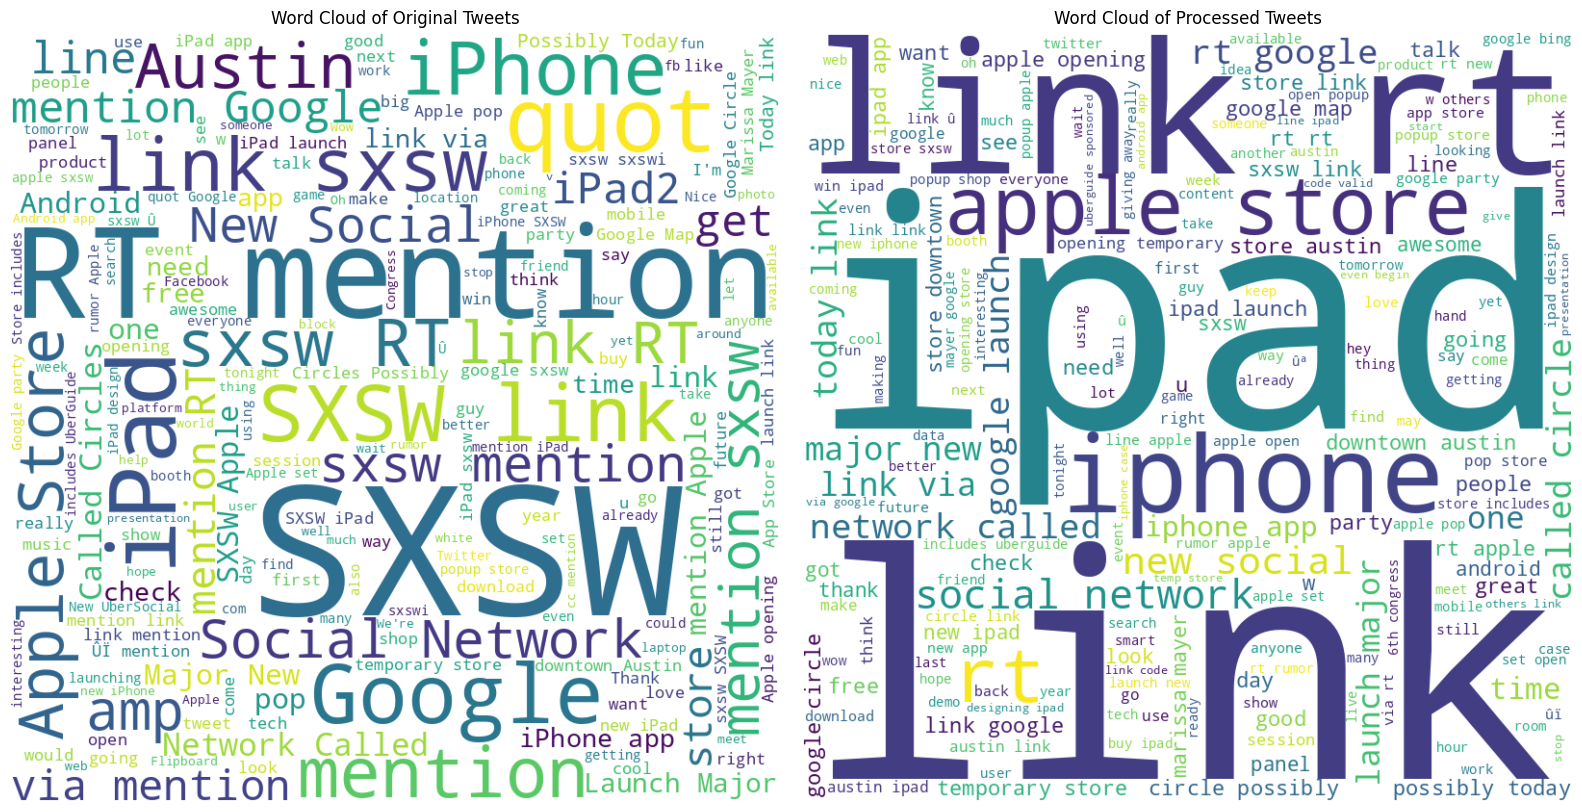

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Since we already have a DataFrame df with 'tweet_text' and 'processed_tweets' columns,
# we need to join the words for the word cloud
# For the processed tweets, each row contains a list of words, so we need to join them into single strings per tweet
df['processed_tweets'] = df['processed_tweets'].apply(lambda x: ' '.join(x))

# Joining the tweets text for original and processed tweets
original_tweets_text = " ".join(df['tweet_text'])
processed_tweets_text = " ".join(df['processed_tweets'])

# Generating word cloud for original tweets
wordcloud_original = WordCloud(width=800, height=800, 
                               background_color='white', 
                               stopwords=set(stopwords.words('english')),
                               min_font_size=10).generate(original_tweets_text)

# Generating word cloud for processed tweets
wordcloud_processed = WordCloud(width=800, height=800, 
                                background_color='white', 
                                min_font_size=10).generate(processed_tweets_text)

# Creating a figure for the subplots
plt.figure(figsize=(16, 8))  # Size of the whole figure

# Plotting the original tweets word cloud
plt.subplot(1, 2, 1)  
plt.imshow(wordcloud_original, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Original Tweets")

# Plotting the processed tweets word cloud 
plt.subplot(1, 2, 2)  
plt.imshow(wordcloud_processed, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Processed Tweets")

# Adjust layout for better spacing and display
plt.tight_layout()

# Show the plot
plt.show()



### ***Observations***

- ***Apple’s presence at SXSW:*** The words “SXSW” and “Apple” are both prominent in the word clouds, suggesting that Apple had a significant presence at the South by Southwest conference.
- ***New iPad:*** The words “iPad,” “new iPad,” and “iPad 2” are also quite large, indicating that Apple may have announced a new iPad model at SXSW.
- ***Social networking:*** The words “social network” and “link” are also prominent, suggesting that Apple may have integrated social networking features into its new products or services.
- ***Pop-up store:*** The words “pop-up store” and “store” appear frequently, suggesting that Apple may have opened a temporary store at SXSW.
- ***Positive sentiment***: The words “great,” “awesome,” and “cool” are also present, suggesting that the reaction to Apple’s announcements at SXSW was positive.

In general, the word clouds suggest that Apple had a successful SXSW, with a focus on new products and social 

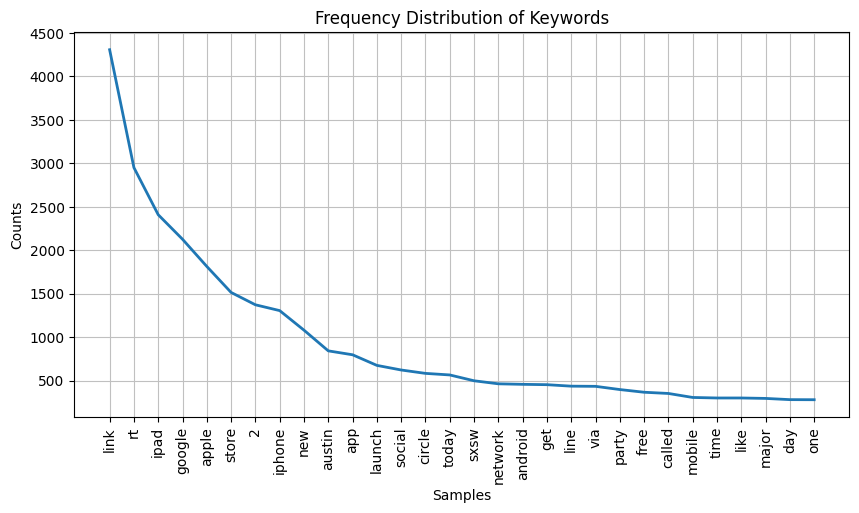

In [8]:


from nltk import FreqDist
from collections import Counter

pro_words = " ".join(df['processed_tweets']).split()

freq_dist = FreqDist(pro_words)
plt.figure(figsize=(10,5))
plt.title("Frequency Distribution of Keywords")
freq_dist.plot(30) # Plotting the top 30 words
plt.show()

### ***Observations***

- ***Keyword Popularity:*** The keyword "link" has the highest count, indicating it is the most frequently occurring word in the dataset. This suggests that discussions around connectivity, sharing, or networking are prevalent.

- ***Technology Focus:*** Just like the word clouds, technology terms like "iPad," "Google," "Apple," "iPhone," and "App" are among the most frequent, reaffirming a strong technology orientation in the data.

- ***Event and Location Specificity:*** "SXSW" and "Austin" are also prominent keywords, which supports the insight that the data is related to conversations around the South by Southwest festival in Austin, Texas.

- ***Temporal and Action Words:*** Words like "today," "get," "launch," "via," "free," "party," and "mobile" are less frequent but still significant, indicating actions, offers, and temporal references in the discussions.

- ***Long-tail Distribution:*** The plot shows a typical long-tail distribution where a small number of keywords have very high frequency, and a large number of keywords have a low frequency. This suggests that while certain topics are very popular, there is also a wide variety of less common topics being discussed.

## ***3.2 PREPARING COLUMN 2***

In [9]:

df = pd.DataFrame(data)

# Create a new column 'processed_tweets' and store the processed tweets in it
df['processed_tweets'] = df['tweet_text'].apply(preprocess_tweet_text)

# Display the DataFrame with the new 'processed_tweets' column
df.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,processed_tweets
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[3g, iphone, 3, hr, tweeting, dead, need, upgr..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[know, awesome, ipad, iphone, app, likely, app..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[wait, 2, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[hope, festival, crashy, iphone, app]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[great, stuff, fri, marissa, mayer, google, ti..."


## ***? Why use Unsupervised learning to predict the missing values***
- Using unsupervised learning to predict missing values helps preserve the integrity and size of the dataset, ensuring that valuable information is not lost. This approach can uncover underlying patterns and relationships in the data, leading to more accurate and insightful analyses. It's particularly beneficial when dealing with large amounts of missing data(Similar to our dataset), as it prevents the introduction of biases that could occur if the data were simply dropped. 

- We'll use SVM model, which is generally a strong performer for text classification tasks.
- We'll also include a simple grid search to tune the hyperparameters of our SVM model.

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords

# Preparing the dataset for model training
train_data = df.dropna(subset=['emotion_in_tweet_is_directed_at'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    train_data['tweet_text'], train_data['emotion_in_tweet_is_directed_at'], test_size=0.2)

# Creating a pipeline with TF-IDF and SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords.words('english'), ngram_range=(1, 2))),
    ('svm', SVC())
])

# Grid Search for Hyperparameter Tuning
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [1, 0.1, 0.01],
    'svm__kernel': ['rbf', 'linear']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Predicting on test set and calculating accuracy
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model:", accuracy)

# Predicting the missing values
missing_values_texts = df[df['emotion_in_tweet_is_directed_at'].isnull()]['tweet_text']
predicted_emotions = best_model.predict(missing_values_texts)

# Updating the original DataFrame with the predicted values
df.loc[df['emotion_in_tweet_is_directed_at'].isnull(), 'emotion_in_tweet_is_directed_at'] = predicted_emotions

# Verify that there are no missing values in 'emotion_in_tweet_is_directed_at'
assert df['emotion_in_tweet_is_directed_at'].isnull().sum() == 0

# Display updated DataFrame
print("Updated DataFrame:")
df.head()


Accuracy of the best model: 0.8767123287671232
Updated DataFrame:


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,processed_tweets
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[3g, iphone, 3, hr, tweeting, dead, need, upgr..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[know, awesome, ipad, iphone, app, likely, app..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[wait, 2, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[hope, festival, crashy, iphone, app]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[great, stuff, fri, marissa, mayer, google, ti..."


### ***? Why Categorize***
- Categorizing tweets into 'Apple' and 'Google' groups enables a targeted analysis of these tech heavyweights, simplifying the dataset for a more direct comparison and clearer insights. This approach is particularly useful for monitoring brand sentiment, spotting market trends, and gaining a deeper understanding of customer opinions. It also assists in strategic planning by highlighting areas of focus for resource allocation and guiding decisions in marketing and product development. By distilling the vast array of data into these two categories, companies can sharpen their competitive edge and tailor their customer engagement more effectively.

In [11]:
# Define keywords for Apple and Google
apple_keywords = ['apple', 'iphone', 'ipad', 'ios', 'mac']
google_keywords = ['google', 'android', 'chrome', 'google play', 'nexus']

# Function to categorize each row
def categorize_by_company(row):
    # Check if row is a string
    if isinstance(row, str):
        # Convert to lowercase to ensure matching is case-insensitive
        text = row.lower()
        # Check if any Apple-related keyword is in the text
        if any(keyword in text for keyword in apple_keywords):
            return 'Apple'
        # Check if any Google-related keyword is in the text
        elif any(keyword in text for keyword in google_keywords):
            return 'Google'
    # If not Apple or Google, return None (or another suitable category)
    return None

# Apply the function to the column and create a new 'brand' column
df['brand'] = df['emotion_in_tweet_is_directed_at'].apply(categorize_by_company)

# Drop rows with None (or another suitable category)
df = df.dropna(subset=['brand'])

# Display updated DataFrame
print("Updated DataFrame:")
df.head()


Updated DataFrame:


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,processed_tweets,brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[3g, iphone, 3, hr, tweeting, dead, need, upgr...",Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[know, awesome, ipad, iphone, app, likely, app...",Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[wait, 2, also, sale]",Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[hope, festival, crashy, iphone, app]",Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[great, stuff, fri, marissa, mayer, google, ti...",Google


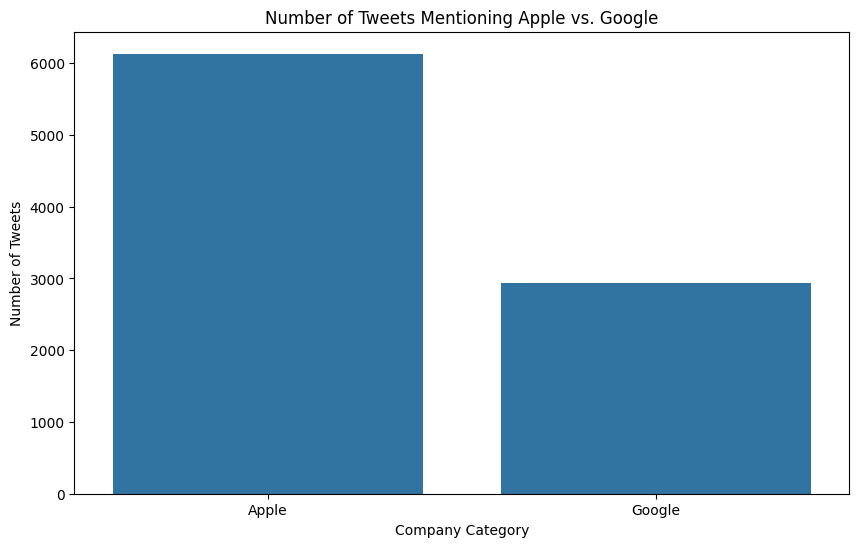

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of tweets for each company category
company_tweet_counts = df['brand'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=company_tweet_counts.index, y=company_tweet_counts.values)
plt.title('Number of Tweets Mentioning Apple vs. Google')
plt.ylabel('Number of Tweets')
plt.xlabel('Company Category')

# Show the plot
plt.show()


### ***Observations***

- ***Volume of Mentions:*** There's a clear difference in the volume of tweets, with Apple being mentioned significantly more often than Google. This suggests that, within the context of this dataset, Apple was a more prominent topic of conversation.

- ***Potential Interest or Popularity:*** The higher number of tweets related to Apple may indicate a greater public interest or popularity in Apple-related topics, or it might reflect a period when Apple was particularly newsworthy, perhaps due to a product launch, event, or some other significant occurrence.

- ***Market Engagement:*** The disparity in the number of tweets could also reflect market engagement or the effectiveness of marketing campaigns during the time the data was collected. It's possible that Apple had more active discussions due to specific marketing activities or consumer engagement strategies.

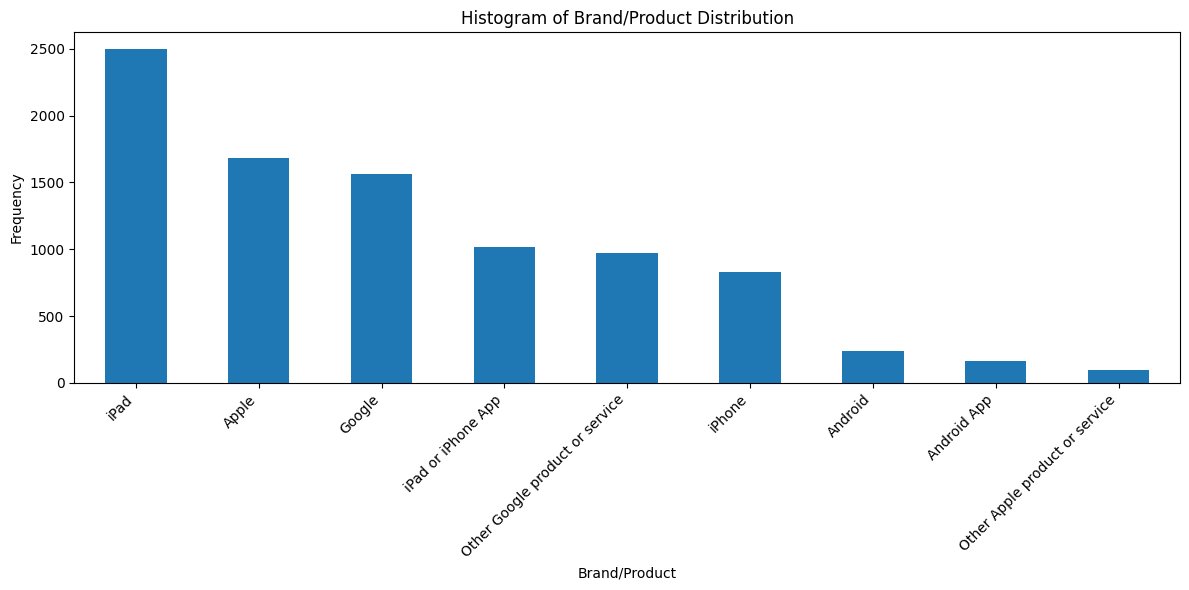

In [13]:

# Count the frequency of each brand/product in the second column
brand_product_counts = df['emotion_in_tweet_is_directed_at'].value_counts()

# Plot a histogram of the brand/product distribution
plt.figure(figsize=(12, 6))
brand_product_counts.plot(kind='bar')
plt.title('Histogram of Brand/Product Distribution')
plt.xlabel('Brand/Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout() 

# Show the plot
plt.show()


### ***Observations***

- ***Most Discussed Products:*** The iPad stands out as the most frequently mentioned product, followed by the generic Apple brand and Google. This could indicate that at the time of data collection, the iPad was a highly discussed topic, possibly due to a recent product launch, update, or other news.

- ***Apple vs. Google Discussion:*** Apple products, including the iPad and iPhone, have a higher overall frequency compared to Google products. This could suggest a stronger or more active online community around Apple products or that the dataset covers an event or period where Apple was more in focus.

- ***Product-Specific Apps and Services:*** There is a notable mention of apps specific to the iPad or iPhone, which could point to discussions about app features, releases, or updates. Google products and services, while also significant, are less frequently mentioned compared to Apple's.

- ***Diversity of Products:*** The histogram shows that the discussion includes a variety of products, indicating a diverse range of interests or concerns among the users. This diversity can be useful for understanding different aspects of user engagement with technology.

- ***Other Categories:*** The categories "Other Google Product or Service" and "Other Apple Product or Service" suggest that the dataset contains a variety of mentions that extend beyond the most popular products. These could include less mainstream products, services, or emerging technologies from both companies.

- ***Market Engagement:*** The frequency of mentions can be a proxy for market engagement or the popularity of certain products. Products with higher mentions might be those that are currently in the spotlight, receiving more attention from consumers and the media.

## ***3.3 PREPARING COLUMN 3***

In [14]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,processed_tweets,brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[3g, iphone, 3, hr, tweeting, dead, need, upgr...",Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[know, awesome, ipad, iphone, app, likely, app...",Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[wait, 2, also, sale]",Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[hope, festival, crashy, iphone, app]",Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[great, stuff, fri, marissa, mayer, google, ti...",Google
...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,"[ipad, everywhere, link]",Apple
9089,"Wave, buzz... RT @mention We interrupt your re...",Other Google product or service,No emotion toward brand or product,"[wave, buzz, rt, interrupt, regularly, schedul...",Google
9090,"Google's Zeiger, a physician never reported po...",Other Google product or service,No emotion toward brand or product,"[zeiger, physician, never, reported, potential...",Google
9091,Some Verizon iPhone customers complained their...,iPhone,No emotion toward brand or product,"[verizon, iphone, customer, complained, time, ...",Apple


In [15]:
# Identify the unique values in the 'sentiment' column and their counts
unique_values_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

# Display the unique values and their counts
unique_values_counts


is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

#### ***Steps to handle column 3***

***1.Consolidation*** We will standardize the unique values by consolidating various forms of sentiment expression into three primary categories: 'Positive', 'Negative', and 'Neutral'. This will involve mapping similar expressions to one of these three categories.

***2.Handling Ambiguity:*** For ambiguous sentiments such as "I can not tell", we will categorize these as 'Neutral' instead of just dropping them.

***3.Balancing the Dataset:*** we will incoporate ;
- Data Augmentation: Generate synthetic samples for the minority classes using techniques like SMOTE. (this will be part of feature engenearing)

In [16]:
#Defining sentiment mapping based on the unique values in our dataset
sentiment_mapping = {
    'Positive emotion': 'Positive',
    'Negative emotion': 'Negative',
    'No emotion toward brand or product': 'Neutral',
    "I can't tell": 'Neutral',
}

# Apply the mapping to consolidate the sentiment categories
df['emotions']= df['is_there_an_emotion_directed_at_a_brand_or_product'].map(sentiment_mapping)

# Verify the mapping and handling of ambiguities
df['emotions'].value_counts()

# show dataset
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,processed_tweets,brand,emotions
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[3g, iphone, 3, hr, tweeting, dead, need, upgr...",Apple,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[know, awesome, ipad, iphone, app, likely, app...",Apple,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[wait, 2, also, sale]",Apple,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[hope, festival, crashy, iphone, app]",Apple,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[great, stuff, fri, marissa, mayer, google, ti...",Google,Positive


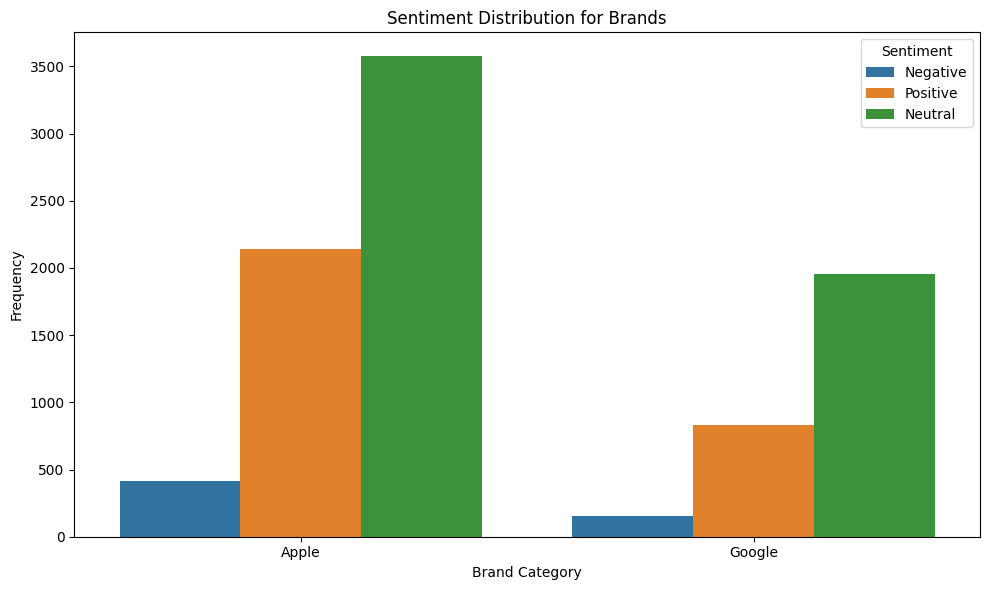

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the sentiment distribution across the brands
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='brand', hue='emotions')
plt.title('Sentiment Distribution for Brands')
plt.xlabel('Brand Category')
plt.ylabel('Frequency')
plt.legend(title='Sentiment')
plt.tight_layout()  
plt.show()


## ***Observations***

- ***Sentiment Prevalence:*** For both brands, neutral sentiments are the most prevalent, followed by positive sentiments. Negative sentiments are the least represented in the dataset.

- ***Comparative Sentiment:*** Apple has a higher frequency of positive sentiments compared to Google.

- ***Neutral Sentiments:*** Both brands have a high number of neutral sentiments, but Apple's neutral sentiment count is substantially higher than that of Google.

- ***Brand Perception:*** The higher number of positive sentiments for Apple could indicate a more favorable perception of the brand, or it could reflect the impact of a specific event or product release that was well-received. Conversely, the relative negative sentiments for Google might point to specific issues or challenges that were being discussed at the time.

- ***Marketing Insights:*** This distribution could provide valuable insights for marketing strategies. Apple may want to capitalize on and maintain the positive sentiment, while Google might look into the causes of negative sentiment to address potential issues.

- ***Consumer Engagement:*** The significant number of neutral sentiments suggests that while many people discuss both brands, their discussions might be informational or neutral in nature, rather than expressing strong opinions. This could also indicate a passive engagement with the brand's content or news.

- ***Data Interpretation:*** The interpretation of 'Neutral' sentiment could be critical. It could either represent a lack of strong feeling towards the brand or a failure to categorize the sentiment of the content accurately.

In [18]:
# Accessing multiple columns as a DataFrame
processed_data = df[['processed_tweets', 'brand', 'emotions']]

# Display the selected columns
processed_data.head()


,processed_tweets,brand,emotions
0,"[3g, iphone, 3, hr, tweeting, dead, need, upgr...",Apple,Negative
1,"[know, awesome, ipad, iphone, app, likely, app...",Apple,Positive
2,"[wait, 2, also, sale]",Apple,Positive
3,"[hope, festival, crashy, iphone, app]",Apple,Negative
4,"[great, stuff, fri, marissa, mayer, google, ti...",Google,Positive


In [19]:
print(type(tweet[0]))

<class 'str'>


***Wonderful***

- Next I'll use my processed data in the Modelling phase

---------------------------------------------
# ***3.MODELING*** 

## ***3.1.1.FEATURE ENGINEERING***


- For the binary classifier we will slice our data to consist of the positives and negatives only 
- perform emotions label encoding 
- one-hot encode the brand 
- Vectorize our text data
- combine transformed features into one dataframe 
- split the data into train, validate and test sets 
 

In [20]:
data = processed_data


In [21]:
# creating a slice of the original data
binary_data = data.loc[(data['emotions'] == 'Positive') | (data['emotions'] == 'Negative')].copy()

# Set the 'emotion_label' column values based on conditions
binary_data.loc[binary_data['emotions'] == 'Positive', 'emotion_label'] = 0
binary_data.loc[binary_data['emotions'] == 'Negative', 'emotion_label'] = 1

binary_data


,processed_tweets,brand,emotions,emotion_label
0,"[3g, iphone, 3, hr, tweeting, dead, need, upgr...",Apple,Negative,1.0
1,"[know, awesome, ipad, iphone, app, likely, app...",Apple,Positive,0.0
2,"[wait, 2, also, sale]",Apple,Positive,0.0
3,"[hope, festival, crashy, iphone, app]",Apple,Negative,1.0
4,"[great, stuff, fri, marissa, mayer, google, ti...",Google,Positive,0.0
...,...,...,...,...
9077,"[pr, guy, convinced, switch, back, iphone, gre...",Apple,Positive,0.0
9079,"[papyrus, sort, like, ipad, nice, lol, lavelle]",Apple,Positive,0.0
9080,"[diller, say, google, tv, might, run, playstat...",Google,Negative,1.0
9085,"[always, used, camera, iphone, b, c, image, st...",Apple,Positive,0.0


In [22]:


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

df = binary_data

# Defining OneHotEncoder
one_hot_encoder = OneHotEncoder()

# One-hot encode the brand column
brand_encoded = one_hot_encoder.fit_transform(df[['brand']]).toarray()
brand_encoded_df = pd.DataFrame(brand_encoded, columns=one_hot_encoder.get_feature_names_out())

# Function to convert the processed tweets to a string
def convert_to_string(x):
    if isinstance(x, str):
        return ' '.join(eval(x))
    elif isinstance(x, list):
        return ' '.join(x)
    else:
        return x

# Apply the function to the 'processed_tweets' column
df['processed_tweets_str'] = df['processed_tweets'].apply(convert_to_string)

# TF-IDF vectorization for processed tweets
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['processed_tweets_str'])

# Combine TF-IDF features with one-hot encoded brand features
combined_features = pd.concat([pd.DataFrame(tfidf_features.toarray()), brand_encoded_df], axis=1)




In [23]:
# Create a DataFrame from combined features
modeling_data = pd.DataFrame(combined_features)

# Concatenate the "emotion label" column to the modeling_data DataFrame
# Ensure that the indices align correctly
modeling_data['emotion_label'] = binary_data['emotion_label'].reset_index(drop=True)

modeling_data


,0,1,2,3,4,5,6,7,8,9,...,4721,4722,4723,4724,4725,4726,4727,brand_Apple,brand_Google,emotion_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# Convert all feature names to strings
modeling_data.columns = modeling_data.columns.astype(str)

X = modeling_data.drop('emotion_label', axis=1)
y = modeling_data['emotion_label']

# Splitting the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## ***3.2.MODEL DEVELOPMENT***

### ***1.BASELINE MODEL (Naive Bayes)***

- Naive Bayes is an excellent choice for a baseline model in classification tasks, especially for text classification, due to its simplicity, efficiency, and strong performance despite its fundamental assumption of feature independence. Its probabilistic foundation is beneficial for understanding classification decisions, and it often rivals more complex models in tasks like spam filtering and sentiment analysis. Additionally, Naive Bayes is effective in high-dimensional spaces, common in text data, and can be robust against irrelevant features. It also offers the advantage of providing probability estimates for predictions. As a baseline, it sets a benchmark for comparison, where any more sophisticated model should demonstrate a significant improvement over Naive Bayes to justify its complexity.

In [25]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define a pipeline with SMOTE and Naive Bayes
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', GaussianNB())
])

# Define the hyperparameter space for tuning
parameters = {
    'smote__k_neighbors': [1, 2, 3, 4, 5],
    # Add other hyperparameters here if needed
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_validate, y_validate)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'smote__k_neighbors': 1}
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       446
         1.0       0.37      0.29      0.33        85

    accuracy                           0.81       531
   macro avg       0.62      0.60      0.61       531
weighted avg       0.79      0.81      0.80       531



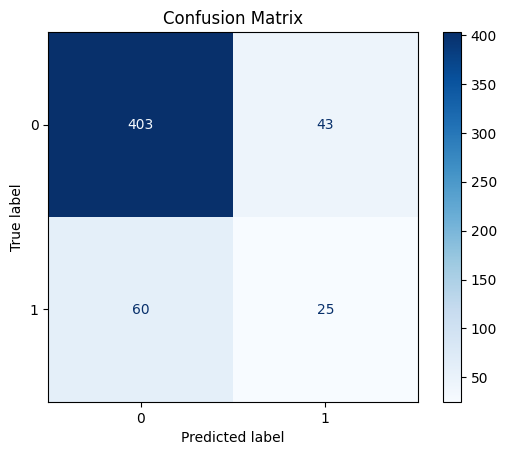

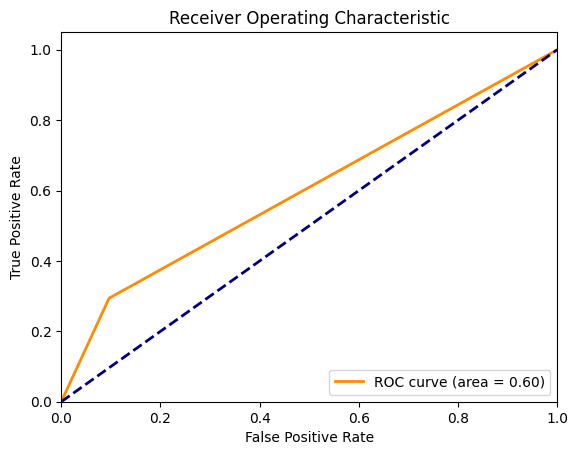

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate the probabilities of each class
y_scores = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### ***Confusion Matrix Interpretation:***
- True Positives (TP): The model correctly predicted 25 positive instances.
- True Negatives (TN): The model correctly predicted 403 negative instances.
- False Positives (FP): The model incorrectly predicted 43 instances as positive which are actually negative.
- False Negatives (FN): The model failed to identify 60 positive instances, incorrectly predicting them as negative.
The confusion matrix suggests that the model is better at identifying negative instances than positive ones.

#### ***ROC Curve Interpretation:***
- The area under the ROC curve (AUC) is 0.60, which is a measure of the model's ability to distinguish between the positive and negative classes. An AUC of 0.60 indicates modest performance, only slightly better than random guessing (AUC of 0.5). Ideally, you'd want the AUC to be as close to 1 as possible.

#### ***Classification Report Interpretation:***
- Precision (Positive): Of all instances predicted as positive, 37% were actually positive.
- Recall (Positive): The model correctly identified 29% of all actual positive instances.
- F1-Score (Positive): The F1-score for the positive class is 0.33, indicating a relatively low balance between precision and recall for this class.
- Accuracy: The model is 81% accurate overall

- The model shows a strong bias towards the negative class, which is also the majority class. This is a common issue in imbalanced datasets where the model tends to favor the majority class. SMOTE was applied to mitigate this, but the results suggest that the model still performs poorly on the minority class.

From these results, we can conclude that while the model is quite good at predicting the negative class, it struggles with the positive class. The modest AUC value suggests that there is significant room for improvement, and to consider trying other models, feature engineering, or different resampling techniques to better handle the class imbalance.

## ***3.1.2.FEATURE ENGINEERING FOR MULTI-CLASS CLASSIFICATION***

- Emotion label encoding 
- Brand one hot encoding 
- Text Vectorization  

In [27]:
multiclass_data = data.copy()

# Set the 'emotion_label' column values based on conditions for the entire dataset
multiclass_data['emotion_label'] = multiclass_data['emotions'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})

multiclass_data

,processed_tweets,brand,emotions,emotion_label
0,"[3g, iphone, 3, hr, tweeting, dead, need, upgr...",Apple,Negative,-1
1,"[know, awesome, ipad, iphone, app, likely, app...",Apple,Positive,1
2,"[wait, 2, also, sale]",Apple,Positive,1
3,"[hope, festival, crashy, iphone, app]",Apple,Negative,-1
4,"[great, stuff, fri, marissa, mayer, google, ti...",Google,Positive,1
...,...,...,...,...
9088,"[ipad, everywhere, link]",Apple,Positive,1
9089,"[wave, buzz, rt, interrupt, regularly, schedul...",Google,Neutral,0
9090,"[zeiger, physician, never, reported, potential...",Google,Neutral,0
9091,"[verizon, iphone, customer, complained, time, ...",Apple,Neutral,0


In [28]:
df = multiclass_data

# Defining OneHotEncoder
one_hot_encoder = OneHotEncoder()

# One-hot encode the brand column
brand_encoded = one_hot_encoder.fit_transform(df[['brand']]).toarray()
brand_encoded_df = pd.DataFrame(brand_encoded, columns=one_hot_encoder.get_feature_names_out())

# Function to convert the processed tweets to a string
def convert_to_string(x):
    if isinstance(x, str):
        return ' '.join(eval(x))
    elif isinstance(x, list):
        return ' '.join(x)
    else:
        return x

# Apply the function to the 'processed_tweets' column
df['processed_tweets_str'] = df['processed_tweets'].apply(convert_to_string)

# TF-IDF vectorization for processed tweets
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['processed_tweets_str'])

# Combine TF-IDF features with one-hot encoded brand features
combined_features = pd.concat([pd.DataFrame(tfidf_features.toarray()), brand_encoded_df], axis=1)

In [29]:
# Create a DataFrame from combined features
mc_modeling_data = pd.DataFrame(combined_features)

# Concatenate the "emotion label" column to the modeling_data DataFrame
mc_modeling_data['emotion_label'] = multiclass_data['emotion_label'].reset_index(drop=True)

mc_modeling_data


,0,1,2,3,4,5,6,7,8,9,...,7507,7508,7509,7510,7511,7512,7513,brand_Apple,brand_Google,emotion_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
9066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
9067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
9068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [30]:
# Convert all feature names to strings
mc_modeling_data.columns = mc_modeling_data.columns.astype(str)

X = mc_modeling_data.drop('emotion_label', axis=1)
y = mc_modeling_data['emotion_label']

# Splitting the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


### ***2.MULTI-CLASS CLASSIFICATION MODEL (Support Vector Machine) SVM***

- Support Vector Machines (SVMs) are highly favored for multiclass classification due to their effectiveness in high-dimensional spaces and their ability to handle both linear and non-linear boundaries through kernel functions. The core principle of maximizing the margin between classes enhances generalization and robustness, making SVM less prone to overfitting, especially in situations where features outnumber samples. Implementations that support one-vs-rest and one-vs-one schemes allow for straightforward application to multiclass tasks. Additionally, SVMs are efficient with sparse data, a common scenario in text classification, and offer theoretical guarantees of global optimization, ensuring stability in the solutions they provide.

- Instead of SMOTE I'll utilize  ***ADASYN (Adaptive Synthetic Sampling)***: Similar to SMOTE, it generates synthetic examples, but with a focus on generating samples next to the original samples that are hard to classify. It can result in better performance for imbalanced datasets where some classes are more difficult to learn.

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, auc


# Define a pipeline with ADASYN and SVM
pipeline = IMBPipeline([
    ('adasyn', ADASYN(random_state=42)),
    ('svc', SVC(probability=True))  # Probability=True is needed for ROC curve
])

# Define the hyperparameter space for tuning the SVM
parameters = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['linear', 'rbf']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_validate, y_validate)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_scores = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))



### ***Confusion Matrix Interpretation:***
- **Class -1 (Negative)**: The model struggles with this class, with only 6 true positives and a large number of false negatives (85). It seems to mostly confuse this class with class 0.
- **Class 0 (Neutral)**: The model performs best on this class, with a high number of true positives (796) and relatively fewer false negatives and false positives.
- **Class 1 (Positive)**: The model also struggles with this class, with only 80 true positives. A significant number of instances from this class are misclassified as class 0.

### ***Classification Report Interpretation:***
- **Precision**:
  - Class -1: When the model predicts class -1, it is correct 55% of the time.
  - Class 0: When the model predicts class 0, it is correct 66% of the time.
  - Class 1: When the model predicts class 1, it is correct 59% of the time.
- **Recall**:
  - Class -1: Of all actual class -1 instances, the model only correctly identifies 7%.
  - Class 0: Of all actual class 0 instances, the model correctly identifies 93%.
  - Class 1: Of all actual class 1 instances, the model correctly identifies 19%.
- **F1-Score**:
  - Class -1: The F1 score is low (0.12), indicating poor balance between precision and recall.
  - Class 0: The F1 score is high (0.77), indicating a good balance between precision and recall.
  - Class 1: The F1 score is modest (0.29), suggesting the model is not well-balanced for this class either.
- **Support**: Shows the number of actual occurrences of each class in the dataset.
- **Accuracy**: The overall accuracy of the model is 65%, which might seem reasonable but is skewed due to the high number of class 0 instances.

### ***Overall Interpretation:***
The model is heavily biased towards class 0, which is the most prevalent class in the dataset. This is evident from the high recall for class 0 and the model's tendency to incorrectly classify other classes as class 0. The overall F1 scores for the minority classes (-1 and 1) are quite low, indicating that the model's performance is inadequate for these classes. This could be due to class imbalance, feature selection, or model parameters not being optimal for the data distribution.

The model's poor performance on the minority classes suggests that further work is needed to balance the model's ability to recognize all classes. This might involve gathering more data for underrepresented classes, trying different feature engineering techniques, tuning the model further, or exploring other resampling strategies or models that are better suited for imbalanced multiclass problems.

## ***2.1.MULTICLASS CLASSIFICATION ITERATIVE MODEL (SVM with SMOTE)***

In [ ]:
# Define a pipeline with SMOTE and SVM
pipeline = IMBPipeline([
    ('smote', SMOTE(random_state=42)),
    ('svc', SVC(probability=True))  # Probability=True is needed for ROC curve
])

# Define the hyperparameter space for tuning the SVM
parameters = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['linear', 'rbf']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_validate, y_validate)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))